### Rendering

### Interactively

In [ ]:
from zxopt.visualization import Window

window = Window()
window.main_loop()


### OpenQASM

In [1]:
from zxopt.openqasm import OpenQasmParser

parser = OpenQasmParser()
circuit = parser.load_file("./circuits/bell_swap.qasm")

### ZX-diagram


/usr/lib64/python3.9/site-packages/graph_tool/draw/cairo_draw.py:1286: RuntimeWarning: divide by zero encountered in true_divide
  zoom = min(output_size[0] / w, output_size[1] / h)


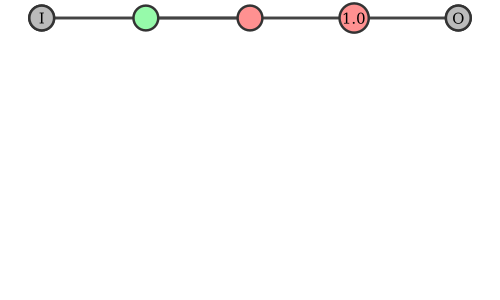

In [2]:
from zxopt.data_structures.diagram import Diagram
from zxopt.visualization import DiagramRenderer
import math

diagram = Diagram()
in1 = diagram.add_boundary("in")
in2 = diagram.add_boundary("in")
out1 = diagram.add_boundary("out")
out2 = diagram.add_boundary("out")

s1_1 = diagram.add_spider(0.0, "green")
s1_2 = diagram.add_spider(0.0, "red")
s2_1 = diagram.add_spider(math.pi, "red")

diagram.add_wire(in1, s1_1)
diagram.add_wire(in2, s1_2)
diagram.add_wire(s1_1, s1_2)
diagram.add_wire(s1_1, s2_1)
diagram.add_wire(s2_1, out1)
diagram.add_wire(s1_2, out2)

# diagram.render()
diagram_renderer = DiagramRenderer(diagram)
diagram_renderer.render_image()

### Circuit translation

In [ ]:
from zxopt.translation import CircuitTranslator
from zxopt.visualization import Window

circuit = OpenQasmParser().load_file("./circuits/test/simple_translation_test.qasm")
diagram = CircuitTranslator(circuit).translate()

renderer = DiagramRenderer(diagram)
# renderer = CircuitRenderer(circuit)

window = Window(renderer)
window.main_loop()

### Validation

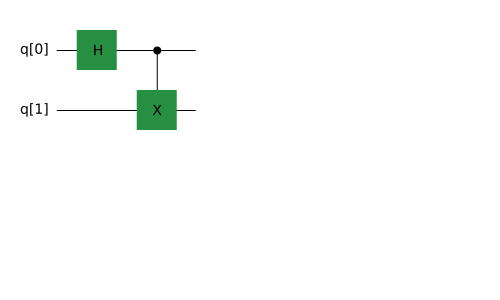

array([[ 0.70710678,  0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ,  0.70710678],
       [ 0.        ,  0.70710678,  0.        , -0.70710678],
       [ 0.70710678,  0.        , -0.70710678,  0.        ]])

In [4]:
from zxopt.data_structures.circuit import Circuit, GateComponent, HadamardGateType, PauliXGateType
from zxopt.data_structures.circuit.register.quantum_register import QuantumRegister
from zxopt.visualization import CircuitRenderer
from zxopt.validation import CircuitUnitaryExtractor

circuit = Circuit()
qreg = QuantumRegister(2, "q")
circuit.add_register(qreg)
h = GateComponent(qreg[0], HadamardGateType())
cx = GateComponent(qreg[1], PauliXGateType(), control_bits={qreg[0]})
circuit.add_component(h)
circuit.add_component(cx)

renderer = CircuitRenderer(circuit)
renderer.render_image()

circuitValidator = CircuitUnitaryExtractor(circuit)
circuitValidator.extract_matrix()


#### Validation tensor contraction

In [19]:
import tensornetwork as tn
import math
import numpy as np

# represents same circuit as above
H = math.sqrt(2) * np.array([[1,1],[1,-1]])
Z3 = np.array([[[1,0],[0,0]],[[0,0],[0,1]]]) # alpha = 0
A = H
B = H
C = Z3
D = H
E = Z3
F = H

linearMap = tn.ncon([A,B,C,D,E,F], [(-3, 1), (-4, 2), (1, -1, 3), (3,4), (2,4,5), (5,-2)])
np.round(linearMap.reshape(4,4), decimals=5) # same as above scaled

# dimension 1 and 2 are input, 3 and 4 are output (how to reshape correctly)
# just swap dimension ids as input to ncon?


array([[ 8., -0.,  8., -0.],
       [-0.,  8., -0.,  8.],
       [-0.,  8.,  0., -8.],
       [ 8., -0., -8.,  0.]])